<div align="center">
    <font size="5"><b><mark>EDA and Predictive Analysis of Car Emissions using Regression Analysis</mark></b></font>
</div>

### Problem Statement

With the increasing emphasis on reducing carbon footprints and promoting sustainable transportation, accurately predicting car emissions has become paramount. Conventional methods for emission estimation are often laborious and lack precision. Therefore, there is a pressing need for data-driven techniques that can predict car emissions efficiently based on specific vehicle attributes.

This project tackles the challenge of creating a robust predictive model for car emissions using a combination of <mark>Exploratory Data Analysis (EDA)</mark> and advanced <mark>regression modeling</mark>. By conducting a thorough EDA, we will uncover hidden insights within a comprehensive dataset encompassing a range of car features and emission measurements. Utilizing this knowledge, we will develop a sophisticated regression model tailored to predict car emissions accurately.







### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

### Importing Dataset

In [2]:
df = pd.read_csv('Fuel_Consumption_2000-2022.csv')
df

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236
22555,2022,Volvo,XC90 T6 AWD,SUV: Standard,2.0,4,AS8,Z,12.4,8.9,10.8,26,252


### Dataset Details

**Fuel Consumption** - City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km).<br>

**Emissions unit** - CO2 Emissions (g/km),Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating.

### Exploratory Data Analysis

In [3]:
df.shape

(22557, 13)

In [4]:
df.size

293241

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22557 entries, 0 to 22556
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22557 non-null  int64  
 1   MAKE              22557 non-null  object 
 2   MODEL             22557 non-null  object 
 3   VEHICLE CLASS     22557 non-null  object 
 4   ENGINE SIZE       22557 non-null  float64
 5   CYLINDERS         22557 non-null  int64  
 6   TRANSMISSION      22557 non-null  object 
 7   FUEL              22557 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22557 non-null  float64
 10  COMB (L/100 km)   22557 non-null  float64
 11  COMB (mpg)        22557 non-null  int64  
 12  EMISSIONS         22557 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [6]:
df.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22557.000000,22557.000000,22557.000000,22556.000000,22557.000000,22557.000000,22557.000000,22557.000000
mean,2011.554905,3.356586,5.854059,12.763513,8.919125,11.034331,27.374474,250.068537
std,6.298514,1.335426,1.819599,3.500999,2.274713,2.910856,7.376824,59.353962
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [7]:
columns_to_use = ['ENGINE SIZE','FUEL CONSUMPTION','EMISSIONS']
data = df[columns_to_use]
data

,ENGINE SIZE,FUEL CONSUMPTION,EMISSIONS
0,1.6,9.2,186
1,1.6,8.5,175
2,3.2,12.2,230
3,3.5,13.4,264
4,1.8,10.0,198
...,...,...,...
22552,2.0,10.5,219
22553,2.0,11.0,232
22554,2.0,11.5,236
22555,2.0,12.4,252


### Checking null values in the dataset for each column

In [8]:
data.isnull().sum()

ENGINE SIZE         0
FUEL CONSUMPTION    1
EMISSIONS           0
dtype: int64

Here it is seen that the feature <mark>FUEL CONSUMPTION</mark> has a null value in it. 

### Missing Value Treatment

In [9]:
Fuel_data = data['FUEL CONSUMPTION'].values.reshape(-1, 1)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(Fuel_data)
data['FUEL CONSUMPTION'] = imputer.transform(Fuel_data)

In [10]:
data.isnull().sum()

ENGINE SIZE         0
FUEL CONSUMPTION    0
EMISSIONS           0
dtype: int64

### Data Visualization on original data to take insights

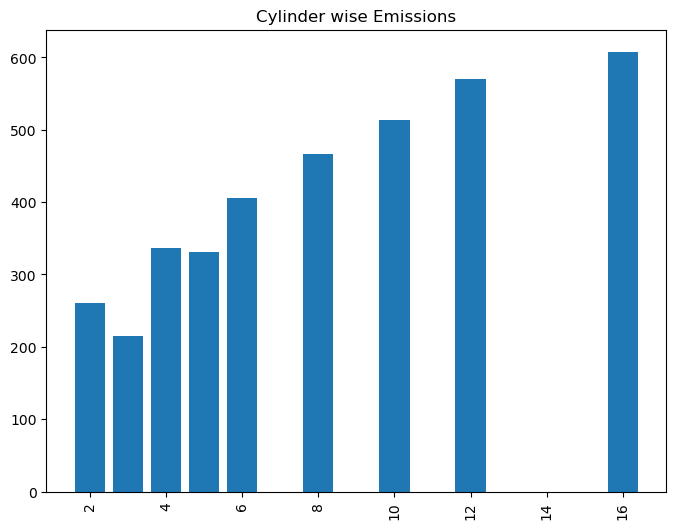

In [11]:
plt.figure(figsize=(8, 6))
plt.bar(df['CYLINDERS'], df['EMISSIONS'])
plt.xticks(rotation=90)
plt.title('Cylinder wise Emissions')
plt.show()

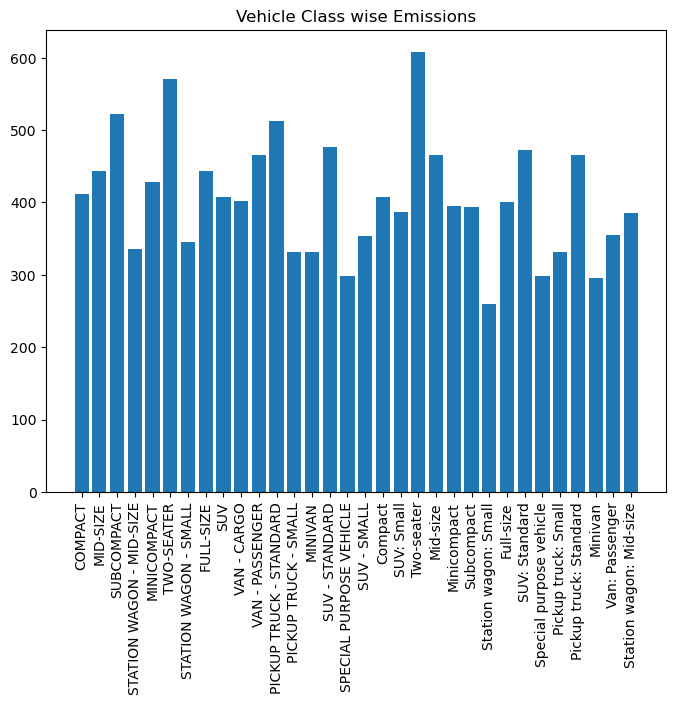

In [12]:
plt.figure(figsize=(8, 6))
plt.bar(df['VEHICLE CLASS'], df['EMISSIONS'])
plt.xticks(rotation=90)
plt.title('Vehicle Class wise Emissions')
plt.show()

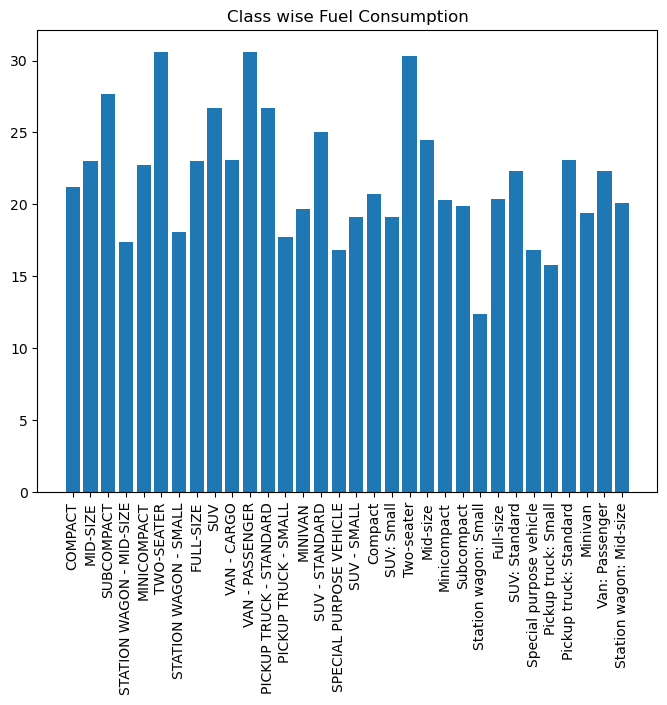

In [13]:
plt.figure(figsize=(8, 6))
plt.bar(df['VEHICLE CLASS'], df['FUEL CONSUMPTION'])
plt.title('Class wise Fuel Consumption')
plt.xticks(rotation=90)
plt.show()

In [14]:
df.corr()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
YEAR,1.000000,-0.077850,-0.072675,-0.098631,-0.007472,-0.068022,0.079971,-0.047864
ENGINE SIZE,-0.077850,1.000000,0.913381,0.821605,0.749378,0.807301,-0.754975,0.821265
CYLINDERS,-0.072675,0.913381,1.000000,0.794943,0.698328,0.771573,-0.714189,0.802156
FUEL CONSUMPTION,-0.098631,0.821605,0.794943,1.000000,0.942351,0.992960,-0.921361,0.919101
HWY (L/100 km),-0.007472,0.749378,0.698328,0.942351,1.000000,0.975014,-0.884743,0.894781
COMB (L/100 km),-0.068022,0.807301,0.771573,0.992960,0.975014,1.000000,-0.920913,0.922982
COMB (mpg),0.079971,-0.754975,-0.714189,-0.921361,-0.884743,-0.920913,1.000000,-0.901843
EMISSIONS,-0.047864,0.821265,0.802156,0.919101,0.894781,0.922982,-0.901843,1.000000


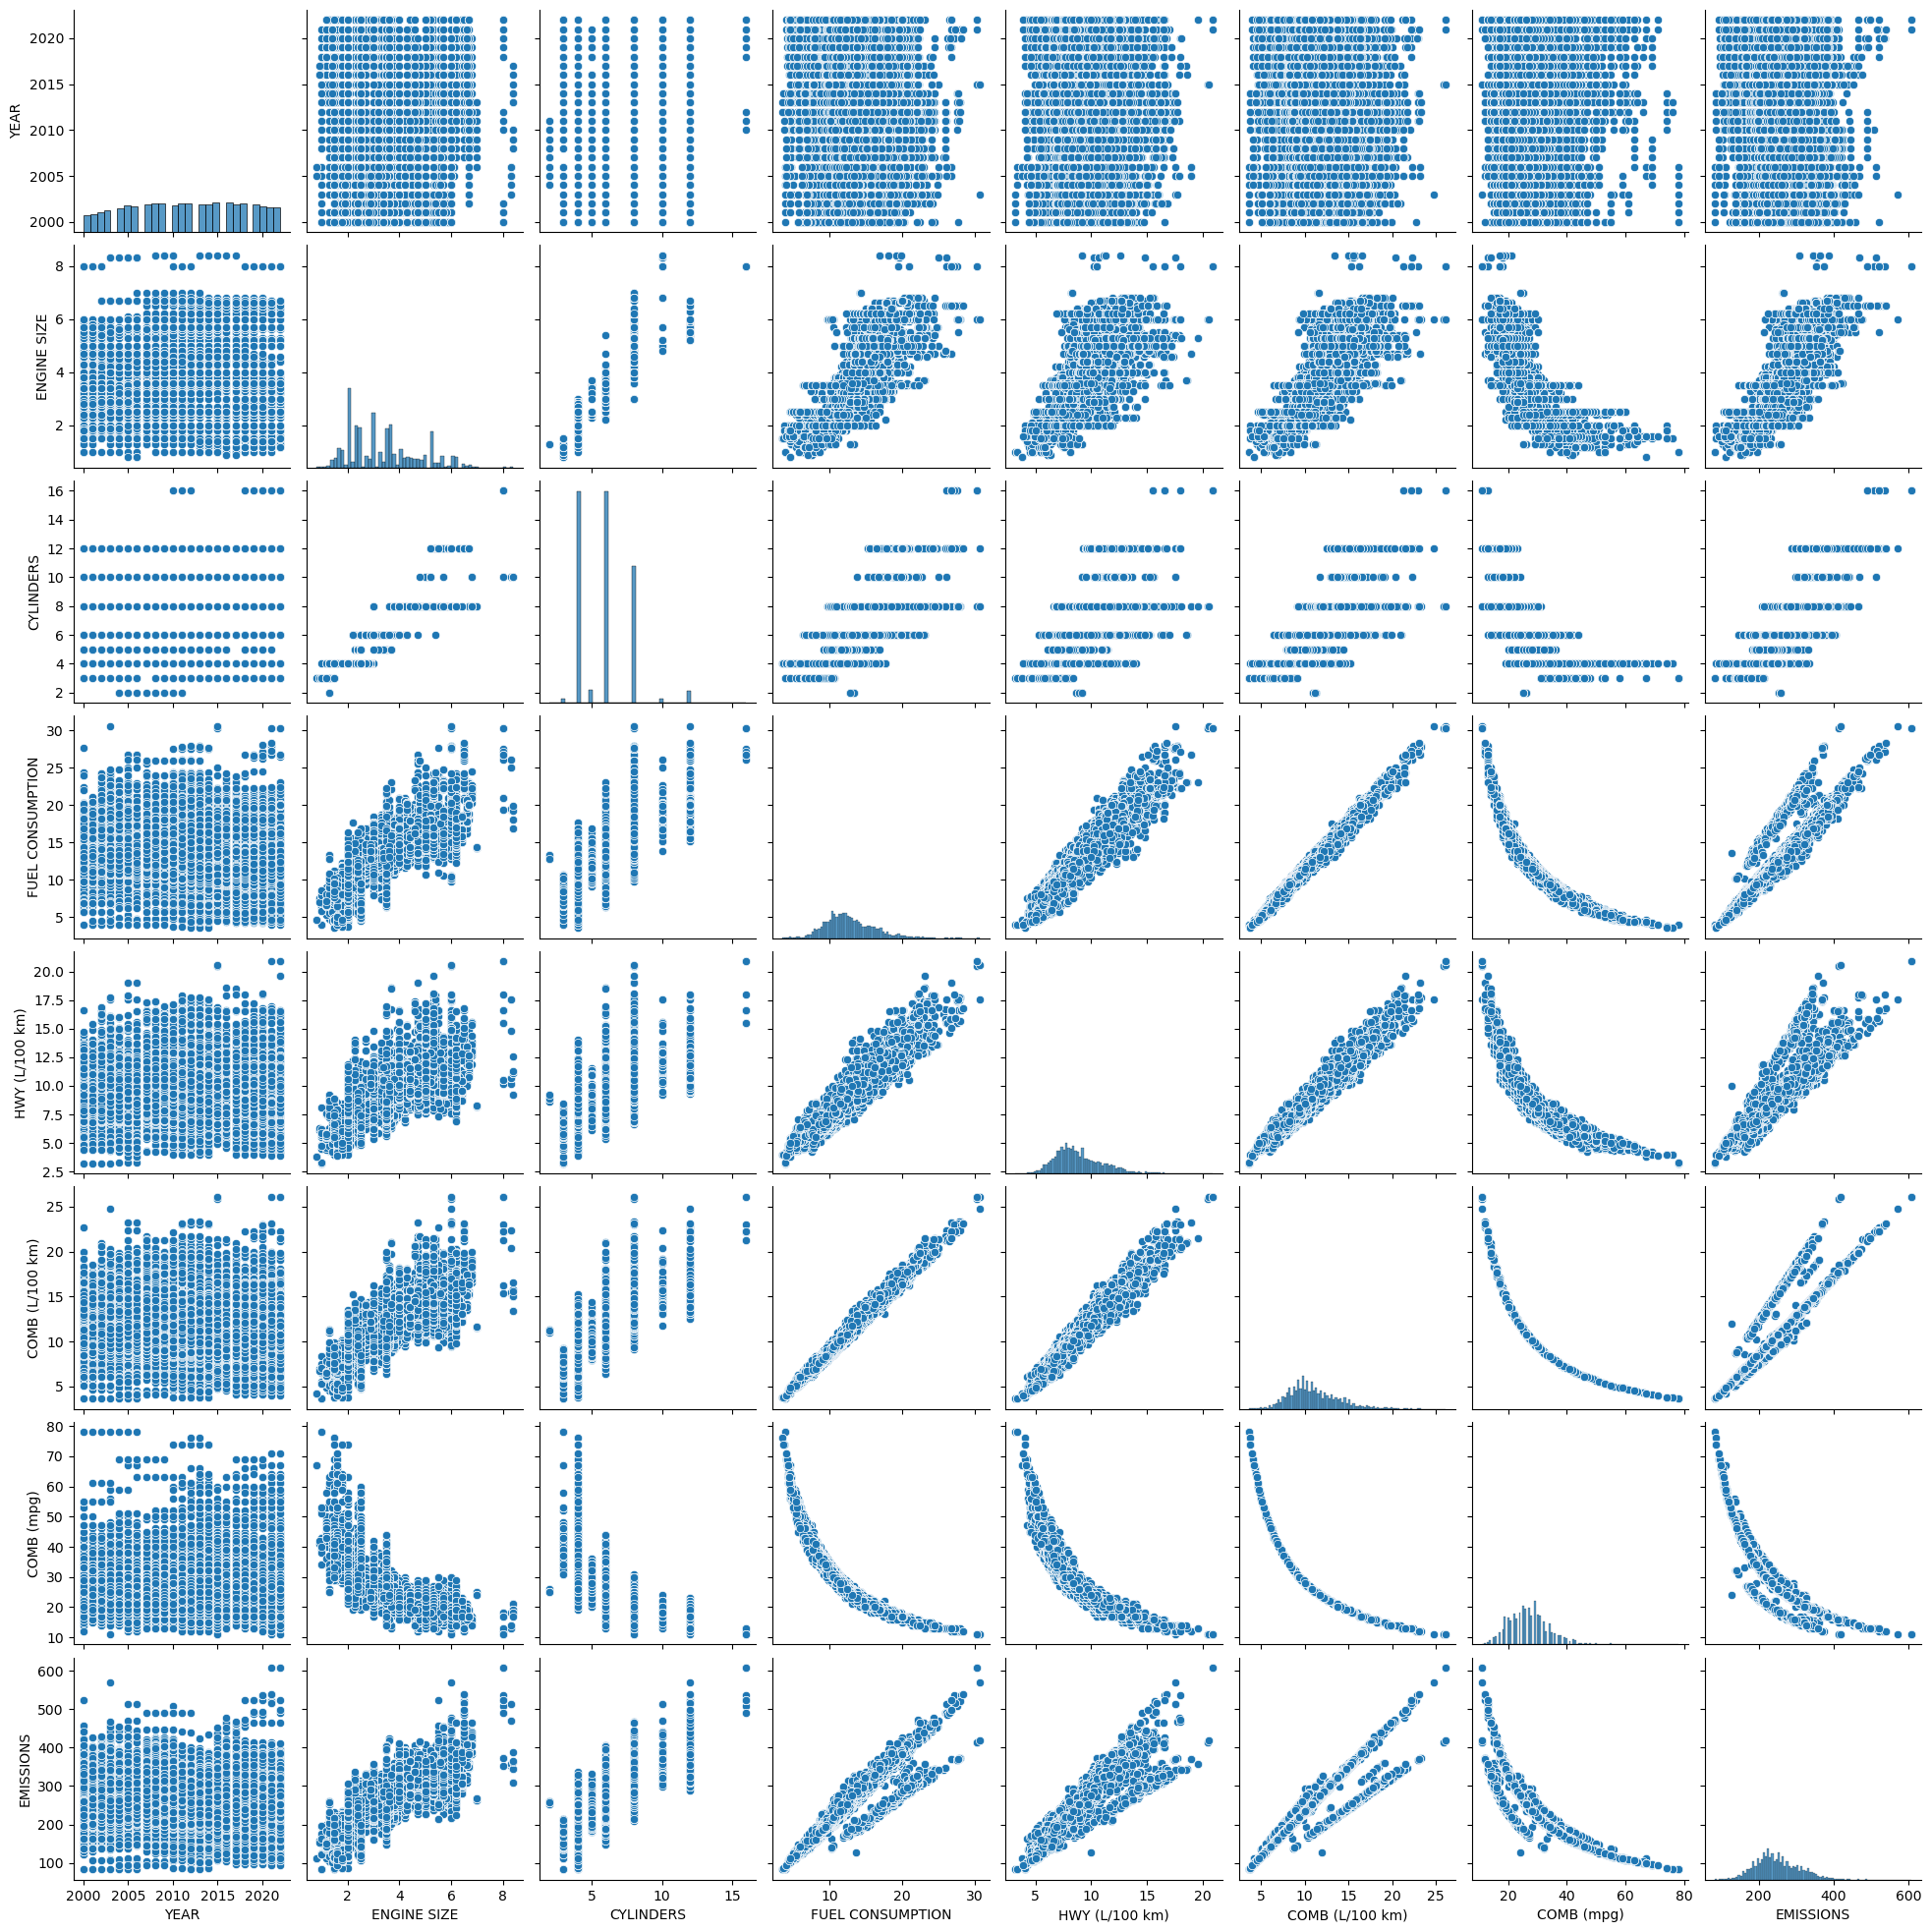

In [15]:
sns.pairplot(df)

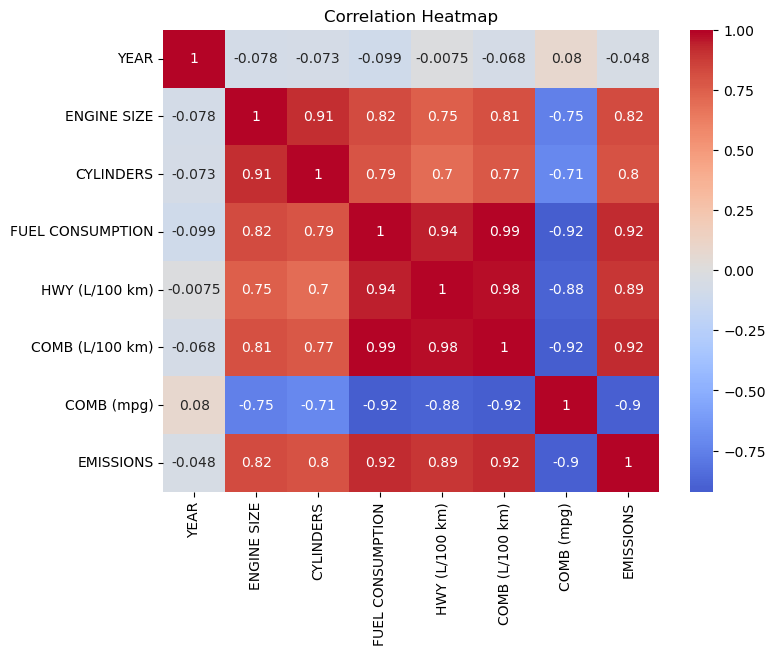

In [16]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

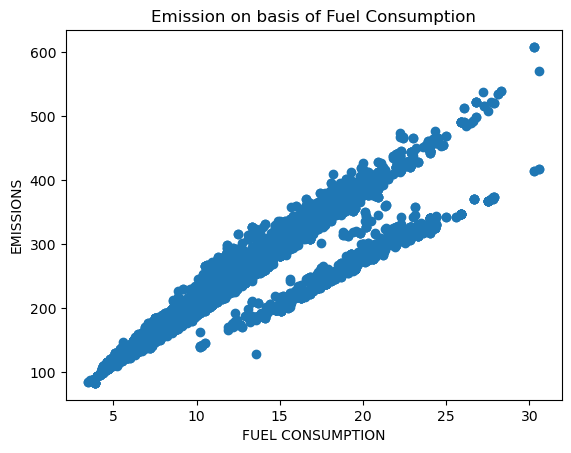

In [17]:
plt.scatter(x = df['FUEL CONSUMPTION'], y = df['EMISSIONS'])
plt.title('Emission on basis of Fuel Consumption')
plt.xlabel('FUEL CONSUMPTION')
plt.ylabel('EMISSIONS')
plt.show()

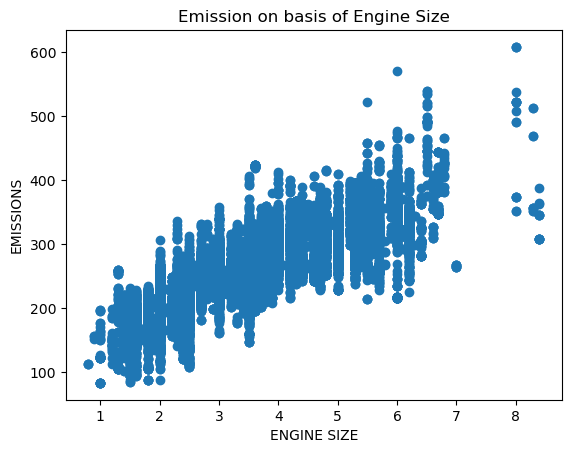

In [18]:
plt.scatter(x = df['ENGINE SIZE'], y = df['EMISSIONS'])
plt.title('Emission on basis of Engine Size')
plt.xlabel('ENGINE SIZE')
plt.ylabel('EMISSIONS')
plt.show()

### Insights

1] First there was a missing value in fuel consumption which was fixed using module SimpleImputer.<br>
2] In the Cylinder wise Emissions bar chart we can see a pattern or a behaviour that as the cylinders are increasing the emissions are also increasing.<br>
3] In the Class wise Emissions bar chart it is seen that the class Two-Seater is producing more emissions than others.<br>
4] In the Class wise Fuel Consumption it is seen that the Two-Seater and Pickup Truck- Standard are 2 classes with highest Fuel  consumption followed by Sub-Compact class.<br>
5] From pairplot and heatmap we can see the correlation of the features which will also come into account when selecting features for model making.

**Feature Selection**<br>
In this case we used two features 'ENGINE SIZE' and 'FUEL CONSUMPTION' because as we see in the heatmap that they would contribute towards increasing the emission rates and as we want to find the cars which are producing high emission these two features will be perfect and logically too these features sound perfect and therefore these two features are taken as independent variable. 

### Model Building 

In [19]:
X = data.iloc[:, [0,1]].values
X.reshape(-1, 1)
X

array([[ 1.6       ,  9.2       ],
       [ 1.6       ,  8.5       ],
       [ 3.2       , 12.2       ],
       ...,
       [ 2.        , 11.5       ],
       [ 2.        , 12.4       ],
       [ 2.        , 12.76351303]])

In [20]:
y = data.iloc[:, -1].values
y.reshape(-1, 1)
y

array([186, 175, 230, ..., 236, 252, 252], dtype=int64)

In [21]:
y = y.reshape(-1, 1)
y

array([[186],
       [175],
       [230],
       ...,
       [236],
       [252],
       [252]], dtype=int64)

### Splitting the data into test train

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Applying the various Regression Models 

### Linear Regression

In [23]:
L_regressor = LinearRegression()
L_regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred_linear = L_regressor.predict(X_test)

In [25]:
print(L_regressor.predict([[1.6,4]]))

[[121.32367714]]


In [26]:
r2_linear = r2_score(y_test, y_pred_linear)
print("R-squared (R2) score:", r2_linear)

R-squared (R2) score: 0.8433568464761122


### Polynomial Regression

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)


In [29]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train_poly, y_train)

LinearRegression()

In [30]:
y_pred_poly = lin_reg_2.predict(X_test_poly)

In [31]:
lin_reg_2.predict(poly_reg.fit_transform([[1.6,4]]))

array([[114.71208002]])

In [32]:
r2_poly = r2_score(y_test, y_pred_poly)
print("R-squared (R2) score:", r2_poly)

R-squared (R2) score: 0.8939781778342083


### Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(random_state = 0)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [34]:
y_pred_DTR = decision_regressor.predict(X_test)

In [35]:
decision_regressor.predict([[1.6,4]])

array([94.])

In [36]:
r2_DTR = r2_score(y_test, y_pred_DTR)
print("R-squared (R2) score:", r2_DTR)

R-squared (R2) score: 0.9578620445821499


### Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor(random_state=0, n_estimators = 100)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [38]:
y_pred_RFR = random_forest_regressor.predict(X_test)

In [39]:
random_forest_regressor.predict([[1.6,4]])

array([94.55514286])

In [40]:
r2_RFR = r2_score(y_test, y_pred_RFR)
print("R-squared (R2) score:", r2_RFR)

R-squared (R2) score: 0.9612823321910922


### SVR 

In [41]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel = 'rbf')
svm_regressor.fit(X_train, y_train)

SVR()

In [42]:
y_pred = svm_regressor.predict(X_test)

In [43]:
svm_regressor.predict([[1.6,4]])

array([122.93921858])

In [44]:
r2_SVR = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2_SVR)

R-squared (R2) score: 0.8510772186144797


### Checking the r2_score of all the models

In [45]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Polynomial Regression', LinearRegression()),  
    ('SVR', SVR(kernel='rbf')),
    ('RandomForestRegressor', RandomForestRegressor(random_state=0, n_estimators=100)),
    ('Decision Tree Regression', DecisionTreeRegressor(random_state=0))
]

for model_name, model in models:
    print(f"Training {model_name}...")
    
    if model_name == 'Polynomial Regression':
        poly_reg = PolynomialFeatures(degree=4)
        X_poly = poly_reg.fit_transform(X_train)
        model.fit(X_poly, y_train)
        X_test_poly = poly_reg.transform(X_test)
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    score = r2_score(y_test, y_pred)
    print(f"{model_name} Accuracy Score: {score:.4f}")

Training Linear Regression...
Linear Regression Accuracy Score: 0.8434
Training Polynomial Regression...
Polynomial Regression Accuracy Score: 0.8940
Training SVR...
SVR Accuracy Score: 0.8511
Training RandomForestRegressor...
RandomForestRegressor Accuracy Score: 0.9613
Training Decision Tree Regression...
Decision Tree Regression Accuracy Score: 0.9579


In [46]:
from sklearn.model_selection import cross_val_score

models = [
    ('Linear Regression', LinearRegression()),
    ('Polynomial Regression', LinearRegression()),  
    ('SVR', SVR(kernel='rbf')),
    ('RandomForestRegressor', RandomForestRegressor(random_state=0, n_estimators=100)),
    ('Decision Tree Regression', DecisionTreeRegressor(random_state=0))
]

for model_name, model in models:
    print(f"Training {model_name}...")
    
    if model_name == 'Polynomial Regression':
        poly_reg = PolynomialFeatures(degree=4)
        X_poly = poly_reg.fit_transform(X_train)
        model.fit(X_poly, y_train)
        X_test_poly = poly_reg.transform(X_test)
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    print(f"{model_name} Cross-Validation Scores: {cv_scores}")
    print(f"Mean CV Score: {np.mean(cv_scores):.4f}")

Training Linear Regression...
Linear Regression Cross-Validation Scores: [0.85664865 0.8608687  0.85419741 0.86565922 0.87018003]
Mean CV Score: 0.8615
Training Polynomial Regression...
Polynomial Regression Cross-Validation Scores: [0.85664865 0.8608687  0.85419741 0.86565922 0.87018003]
Mean CV Score: 0.8615
Training SVR...
SVR Cross-Validation Scores: [0.85864238 0.86462061 0.849724   0.86688604 0.84944932]
Mean CV Score: 0.8579
Training RandomForestRegressor...
RandomForestRegressor Cross-Validation Scores: [0.9591428  0.9614902  0.9641124  0.96323517 0.95948707]
Mean CV Score: 0.9615
Training Decision Tree Regression...
Decision Tree Regression Cross-Validation Scores: [0.9565199  0.95902479 0.96591272 0.96083086 0.95848782]
Mean CV Score: 0.9602


Here it is seen that the <mark>Random Forest Regressor</mark> is performing really well with highest accuracy among all the models.<br>
So we predict the values from Random Forest Regression model and take input from user.

### Taking input from user for the Random Forest Regression Model

In [47]:
Engine_size = float(input("Enter the Engine Size: "))
Fuel_consumption = float(input("Enter the Fuel Consumption: "))
input_values = np.array([[Engine_size, Fuel_consumption]])
predicted_emission = random_forest_regressor.predict(input_values)
print("Predicted Emission (G/Km):", predicted_emission)

Enter the Engine Size: 3.2
Enter the Fuel Consumption: 12.2
Predicted Emission (G/Km): [241.48189114]
